In [1]:
from prophet import Prophet
import pandas as pd
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

### Forecasting Growth

By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

Prophet allows you to make forecasts using a [logistic growth](https://en.wikipedia.org/wiki/Logistic_function) trend model, with a specified carrying capacity. We illustrate this with the log number of page visits to the [R (programming language)](https://en.wikipedia.org/wiki/R_%28programming_language%29) page on Wikipedia:

In [2]:
df = pd.read_csv('../examples/example_wp_log_R.csv')

We must specify the carrying capacity in a column `cap`. Here we will assume a particular value, but this would usually be set using data or expertise about the market size.

In [3]:
df['cap'] = 8.5

The important things to note are that `cap` must be specified for every row in the dataframe, and that it does not have to be constant. If the market size is growing, then `cap` can be an increasing sequence.

We then fit the model as before, except pass in an additional argument to specify logistic growth:

In [4]:
m = Prophet(growth='logistic')
m.fit(df)

Initial log joint probability = -19.9808


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9006.05    0.00251723       371.639           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9015.69     0.0046687       313.236           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       9016.21   9.17871e-05       91.8808   1.034e-06       0.001      296  LS failed, Hessian reset 
     286       9017.89   0.000185596       185.566   1.038e-06       0.001      443  LS failed, Hessian reset 
     299       9018.74    0.00509197       360.686      0.7599      0.7599      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9019.59   3.43241e-05       54.6787           1           1      592   
    Iter      log prob        ||dx||      ||grad||       alpha

We make a dataframe for future predictions as before, except we must also specify the capacity in the future. Here we keep capacity constant at the same value as in the history, and forecast 5 years into the future:

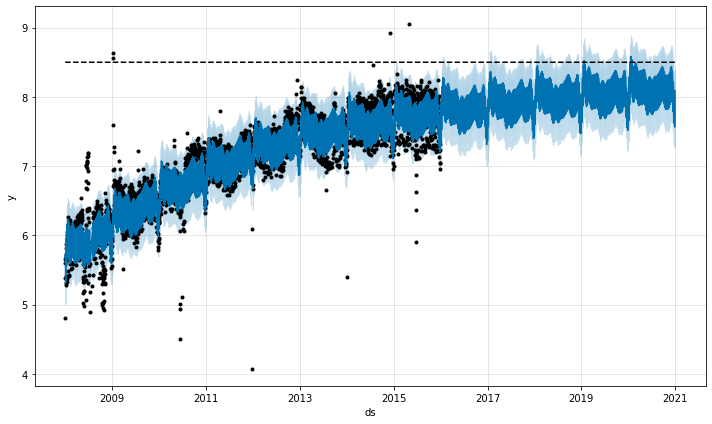

In [5]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

The logistic function has an implicit minimum of 0, and will saturate at 0 the same way that it saturates at the capacity. It is possible to also specify a different saturating minimum.

### Saturating Minimum

The logistic growth model can also handle a saturating minimum, which is specified with a column `floor` in the same way as the `cap` column specifies the maximum:

Initial log joint probability = -109.241
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6944.35     0.0253415       135.002           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       6944.43   0.000433103       105.285   3.264e-06       0.001      159  LS failed, Hessian reset 
     141       6947.05   0.000407354       92.3354   3.359e-06       0.001      242  LS failed, Hessian reset 
     199       6949.43      0.016813       135.486      0.5236           1      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221        6950.1    0.00049561       106.725   2.694e-06       0.001      378  LS failed, Hessian reset 
     284       6950.49    0.00023645       62.4551   2.944e-06       0.001      500  LS failed, Hessian reset 
     299       6950.49   2.17008e-05       63.4975       0.166   

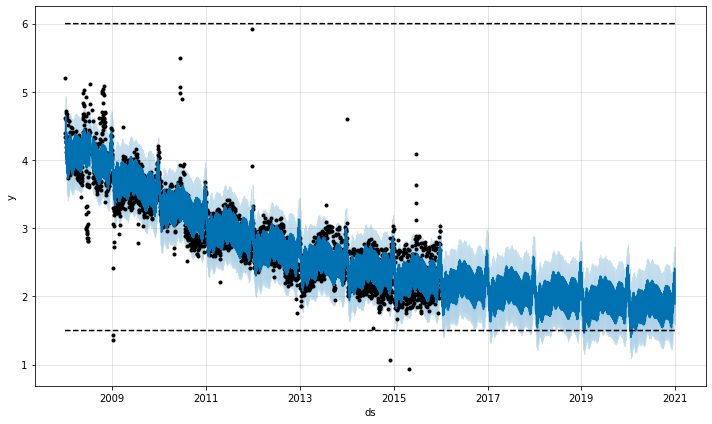

In [6]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.